# 벌꿀 채취

각 벌통에 있는 꿀의 양이 주어졌을 때, 다음과 같은 과정으로 벌꿀을 채취하여 최대한 많은 수익을 얻으려고 한다.

   ① 두 명의 일꾼이 있다. 꿀을 채취할 수 있는 벌통의 수 M이 주어질 때, 
       각각의 일꾼은 가로로 연속되도록 M개의 벌통을 선택하고, 선택한 벌통에서 꿀을 채취할 수 있다.
       단, 두 명의 일꾼이 선택한 벌통은 서로 겹치면 안 된다. 

   ② 두 명의 일꾼은 선택한 벌통에서 꿀을 채취하여 용기에 담아야 한다.
       단, 서로 다른 벌통에서 채취한 꿀이 섞이게 되면 상품가치가 떨이지게 되므로, 하나의 벌통에서 채취한 꿀은 하나의 용기에 담아야 한다.
       하나의 벌통에서 꿀을 채취할 때, 일부분만 채취할 수 없고 벌통에 있는 모든 꿀을 한번에 채취해야 한다.
       두 일꾼이 채취할 수 있는 꿀의 최대 양은 C 이다.

   ③ 채취한 꿀은 시장에서 팔리게 된다. 이때 하나의 용기에 있는 꿀의 양이 많을수록 상품가치가 높아, 각 용기에 있는 꿀의 양의 제곱만큼의 수익이 생긴다.
   
   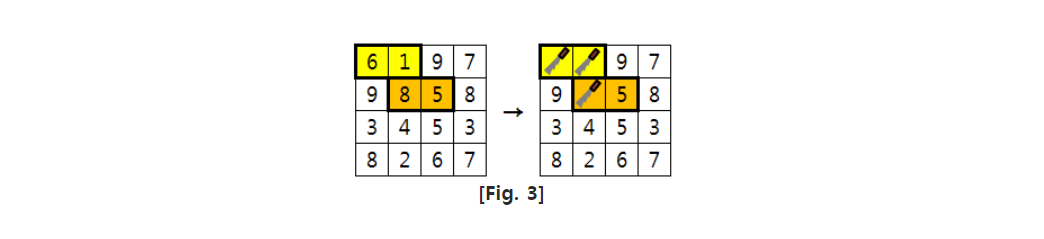
   
       예를 들어 위와같이 꿀을 채취할 경우, 꿀의 양이 6, 1, 8인 세 개의 용기가 얻어지며 이때 수익의 합은, (6*6) + (1*1) + (8*8) = 36 + 1 + 64 = 101 이 된다.


벌통들의 크기 N과 벌통에 있는 꿀의 양에 대한 정보, 선택할 수 있는 벌통의 개수 M, 꿀을 채취할 수 있는 최대 양 C가 주어진다.

이때 두 일꾼이 꿀을 채취하여 얻을 수 있는 수익의 합이 최대가 되는 경우를 찾고, 그 때의 최대 수익을 출력하는 프로그램을 작성하라.

In [ ]:
from itertools import combinations
def check(y, x):
    global C
    global ans
    temp=[]
    max=0
    
    for i in range(x, x+M):
        temp.append(board[y][i])
    if sum(temp)>C:
        for j in range(M-1, 0, -1):
            comb=combinations(temp, j)
            for item in comb:
                combsum=0
                checksum=0
                for one in item:
                    combsum+=(one ** 2)
                    checksum+=one
                if checksum>C:
                    continue
                if combsum>max:
                    max=combsum
        return max
    
    else:
        for i in temp:
            max+=(i **2)
        return max    
                    
                        
def dfs(idx, y, x, money):
    global ans
    if idx==0:
        #1번이 고를 때
        for i in range(0, N):
            for j in range(0, N+1-M):
                add = check(i, j)
                dfs(idx+1,i ,  j+M, add)
                                     
    else:
        #2번이 고를 때
        for i in range(y, N):
            for j in range(0, N+1-M):
                if i ==y and j<x: continue
                else:
                    add=check(i, j)
                    if money+add > ans:
                        ans= money+add
                    
                
   


T = int(input())
# 여러개의 테스트 케이스가 주어지므로, 각각을 처리합니다.
for test_case in range(1, T + 1):
    N, M, C = map ( int , input().split())
    board = [list( map( int, input().split())) for _ in range(N)]
    ans=0
    dfs(0, 0, 0, 0)
    print("#{} {}".format(test_case, ans))
    
    